In [7]:
import numpy as np
# from keras.preprocessing import image
from keras.applications import inception_v3

import keras.utils as image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
cat = "/content/drive/MyDrive/dataset/hacked_img/cat_ori_img.png"
hack = "/content/drive/MyDrive/dataset/hacked_img/hack_img.png"

In [13]:
cat_img = image.load_img(cat)
hack_img = image.load_img(hack)

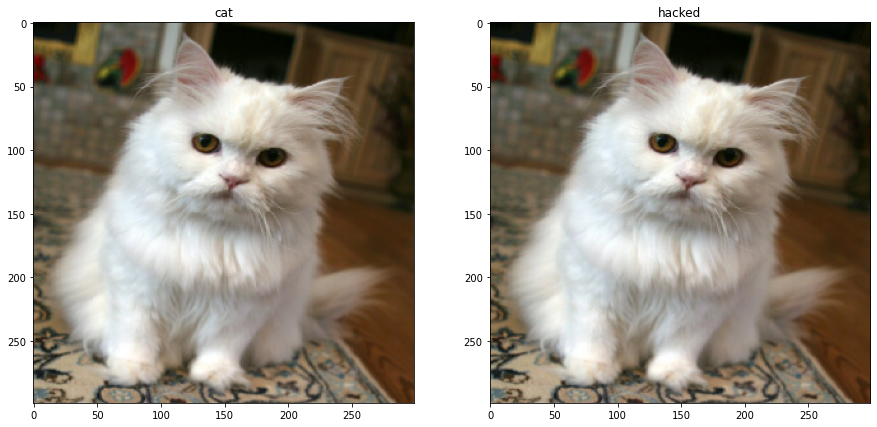

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title('cat')
plt.imshow(cat_img)
plt.subplot(1,2,2)
plt.title('hacked')
plt.imshow(hack_img)


In [25]:
import cv2
from skimage import metrics

In [17]:
imageA = cv2.imread("/content/drive/MyDrive/dataset/hacked_img/cat_ori_img.png")  # 원본
imageB = cv2.imread("/content/drive/MyDrive/dataset/hacked_img/hack_img.png")  # 비교
imageC = imageA.copy()  # 결과물 저장용

tempDiff = cv2.subtract(imageA, imageB)

grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


In [26]:
(score, diff) = metrics.structural_similarity(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

print(f"Similarity: {score:.5f}")

assert score, "다른 점 찾을 수 없음"

Similarity: 0.99789


In [27]:
thresh = cv2.threshold(diff, 0, 255,
                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# 차이점 빨간색으로 칠하기
tempDiff[thresh == 255] = [0, 0, 255]
imageC[thresh == 255] = [0, 0, 255]


In [28]:
# 다른 점 diff3.png로 저장
cv2.imwrite("/content/drive/MyDrive/dataset/hacked_img/diff.png", imageC)

True

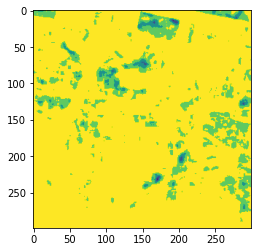

In [30]:
plt.imshow(diff)

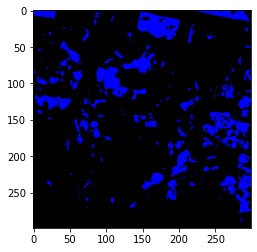

In [31]:
plt.imshow(tempDiff)

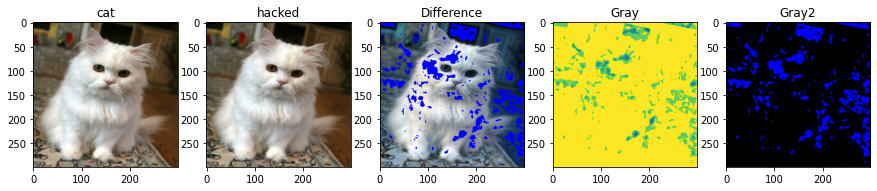

In [32]:
plt.figure(figsize=(15, 10))
plt.subplot(1,5,1)
plt.title('cat')
plt.imshow(cat_img)
plt.subplot(1,5,2)
plt.title('hacked')
plt.imshow(hack_img)
plt.subplot(1,5,3)
plt.title('Difference')
plt.imshow(imageC)
plt.subplot(1,5,4)
plt.title('Gray')
plt.imshow(diff)
plt.subplot(1,5,5)
plt.title('Gray2')
plt.imshow(tempDiff)

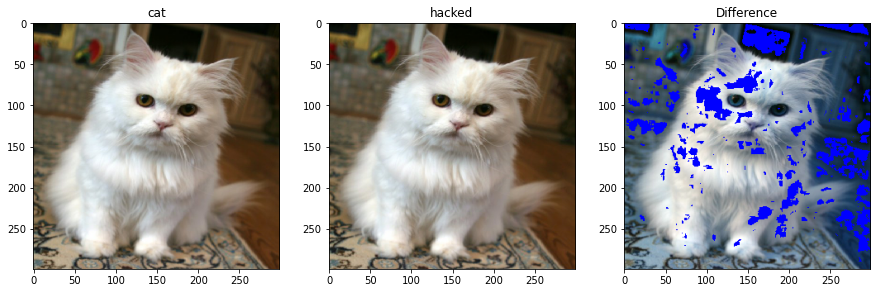

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.title('cat')
plt.imshow(cat_img)
plt.subplot(1,3,2)
plt.title('hacked')
plt.imshow(hack_img)
plt.subplot(1,3,3)
plt.title('Difference')
plt.imshow(imageC)
# plt.subplot(1,5,4)
# plt.title('Gray')
# plt.imshow(diff)
# plt.subplot(1,5,5)
# plt.title('Gray2')
# plt.imshow(tempDiff)